In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../data/raw.csv")

In [4]:
data.shape

(97712, 10)

In [5]:
data.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


In [6]:
data.drop(columns=['model'], inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          97712 non-null  int64  
 1   price         97712 non-null  int64  
 2   transmission  97712 non-null  object 
 3   mileage       97712 non-null  int64  
 4   fuelType      97712 non-null  object 
 5   tax           97712 non-null  int64  
 6   mpg           97712 non-null  float64
 7   engineSize    97712 non-null  float64
 8   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 6.7+ MB


In [8]:
num_cols = data.select_dtypes(exclude='object')
cat_cols = data.select_dtypes(include='object')

In [9]:
for i in cat_cols.columns:
    print(f"{i}: {len(cat_cols[i].unique())}")

transmission: 4
fuelType: 5
Manufacturer: 9


In [10]:
data.isnull().sum()

year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Manufacturer    0
dtype: int64

In [11]:
outlier_cols = ['price','mileage','mpg','engineSize','tax']

In [12]:
for col in outlier_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f'{col} lower : {lower_bound}')
    print(f'{col} upper : {upper_bound}')
    
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers")

price lower : -6127.5
price upper : 36876.5
price: 3825 outliers
mileage lower : -29567.5
mileage upper : 69740.5
mileage: 3836 outliers
mpg lower : 23.550000000000008
mpg upper : 86.35
mpg: 930 outliers
engineSize lower : -2.220446049250313e-16
engineSize upper : 3.2
engineSize: 648 outliers
tax lower : 95.0
tax upper : 175.0
tax: 28594 outliers


In [13]:
for col in outlier_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f'{col} lower : {lower_bound}')
    print(f'{col} upper : {upper_bound}')

    data = data[~(data[col] < lower_bound) & ~(data[col] > upper_bound)] 
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers")

price lower : -6127.5
price upper : 36876.5
price: 0 outliers
mileage lower : -28680.25
mileage upper : 70225.75
mileage: 0 outliers
mpg lower : 23.550000000000008
mpg upper : 86.35
mpg: 0 outliers
engineSize lower : -2.220446049250313e-16
engineSize upper : 3.2
engineSize: 0 outliers
tax lower : 95.0
tax upper : 175.0
tax: 0 outliers


In [14]:
data.shape

(63996, 9)

## Visualisation

## Histogram

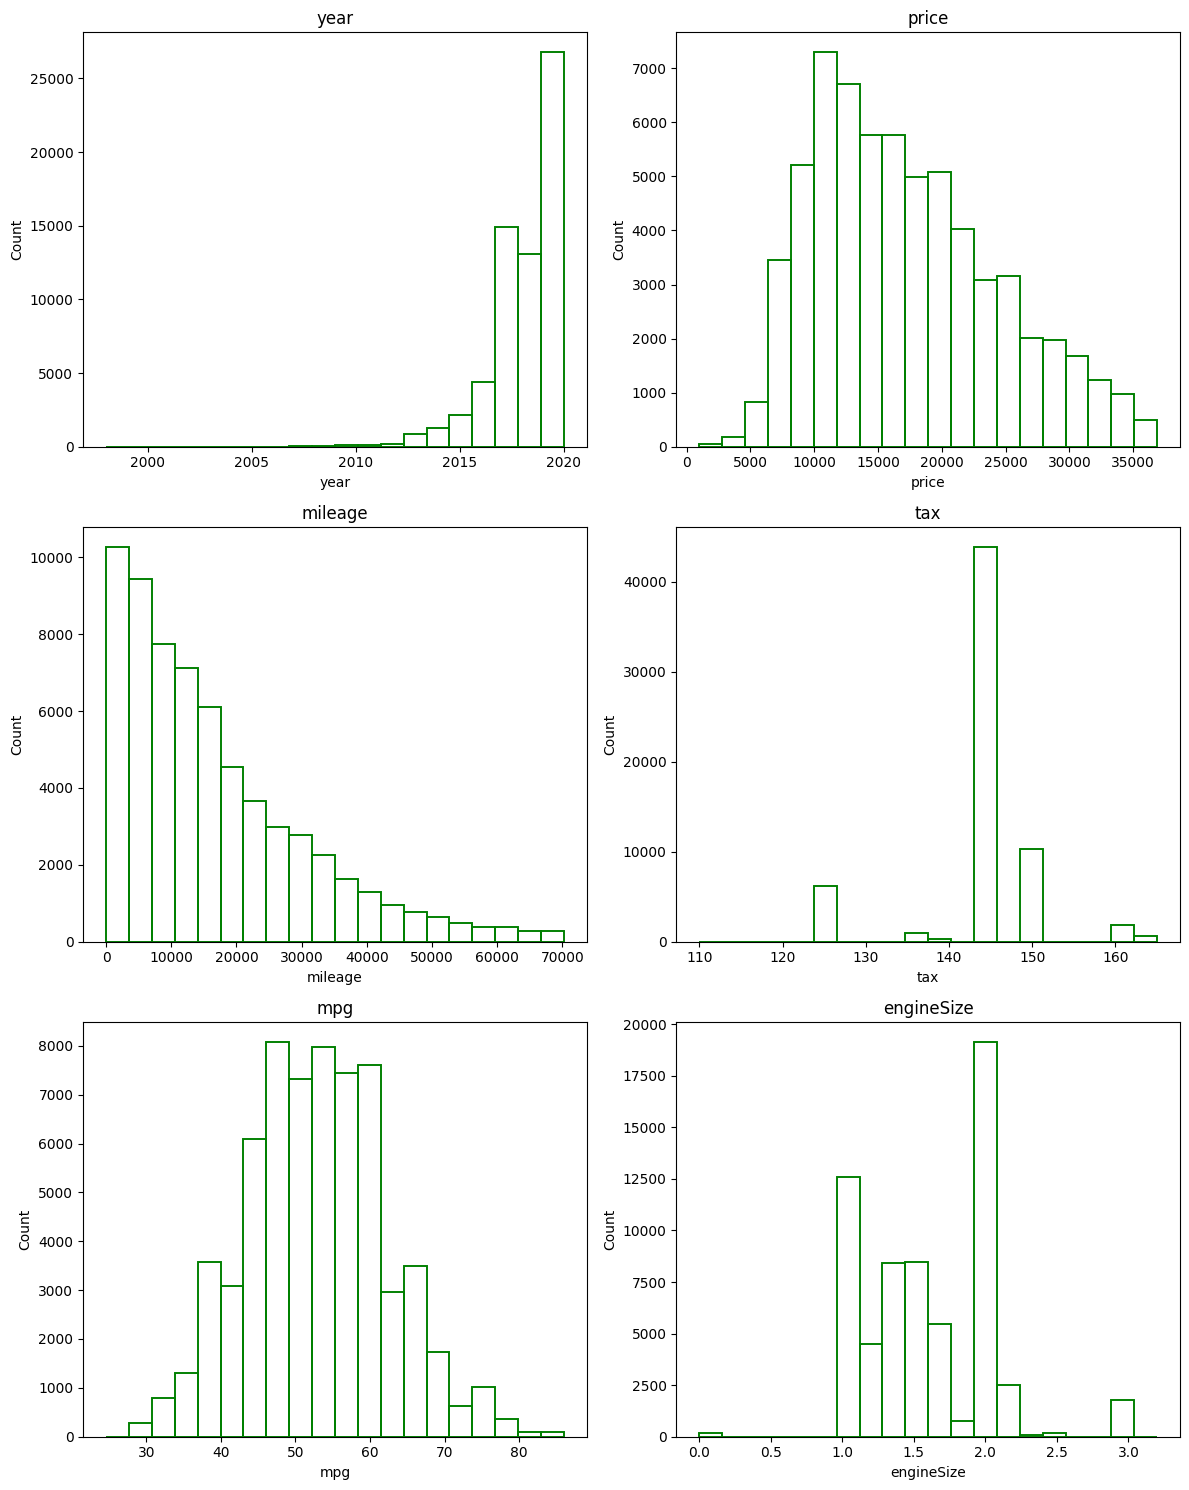

In [46]:

num_cols = data.select_dtypes(exclude='object')
n_bins = 20
ncols = len(num_cols.columns)

fig, axes = plt.subplots(nrows=int((ncols + 1) / 2), ncols=2, figsize=(12, 15))
axes_flat = axes.ravel()

for i, col in enumerate(num_cols.columns):
    sns.histplot(data=data, x=col, ax=axes_flat[i], bins=n_bins, color='green', fill=False)  # Adjust color as needed
    axes_flat[i].set_title(col)

if ncols % 2 != 0:
    axes_flat[-1].axis('off')

fig.tight_layout()



## BarPlot

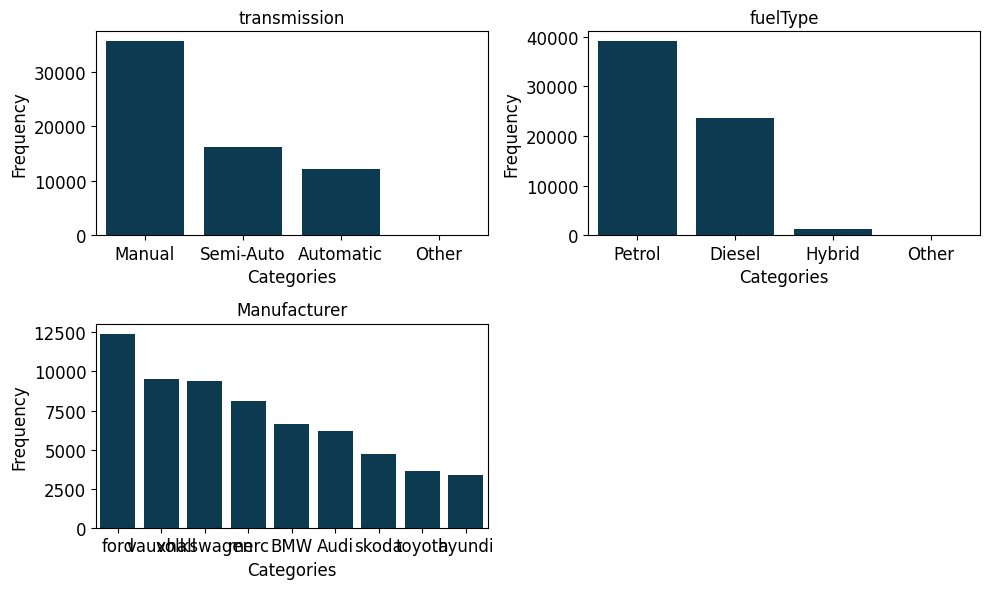

In [55]:
cat_cols = data.select_dtypes(include='object')
ncols = len(cat_cols.columns)

fig, axes = plt.subplots(nrows=int((ncols + 1) / 2), ncols=2, figsize=(10, 6))
axes_flat = axes.ravel()

for i, col in enumerate(cat_cols.columns):
    # sns.barplot(data=data, x=col, ax=axes_flat[i], )
    sns.barplot(
    x=data[col].value_counts().index,   # X-axis: Index (categories) of the value counts
    y=data[col].value_counts(),         # Y-axis: The actual counts
    ax=axes_flat[i],                    # Specify the subplot axis
    color='#003f5c',                   # Set the bar color
)
    axes_flat[i].set_title(col)
    axes_flat[i].set_xlabel('Categories', fontsize=12)
    axes_flat[i].set_ylabel('Frequency', fontsize=12)
    axes_flat[i].tick_params(axis='both', which='major', labelsize=12)

    if ncols % 2!= 0:
        axes_flat[-1].axis('off')

    fig.tight_layout()

In [71]:
data.columns

Index(['year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize', 'Manufacturer'],
      dtype='object')

barplot 
1. mileage vs fueltype
2. mpg vs fueltype
3. mileage vs transmission
4. mpg vs transmission

ValueError: Could not interpret value `fueltype` for `y`. An entry with this name does not appear in `data`.

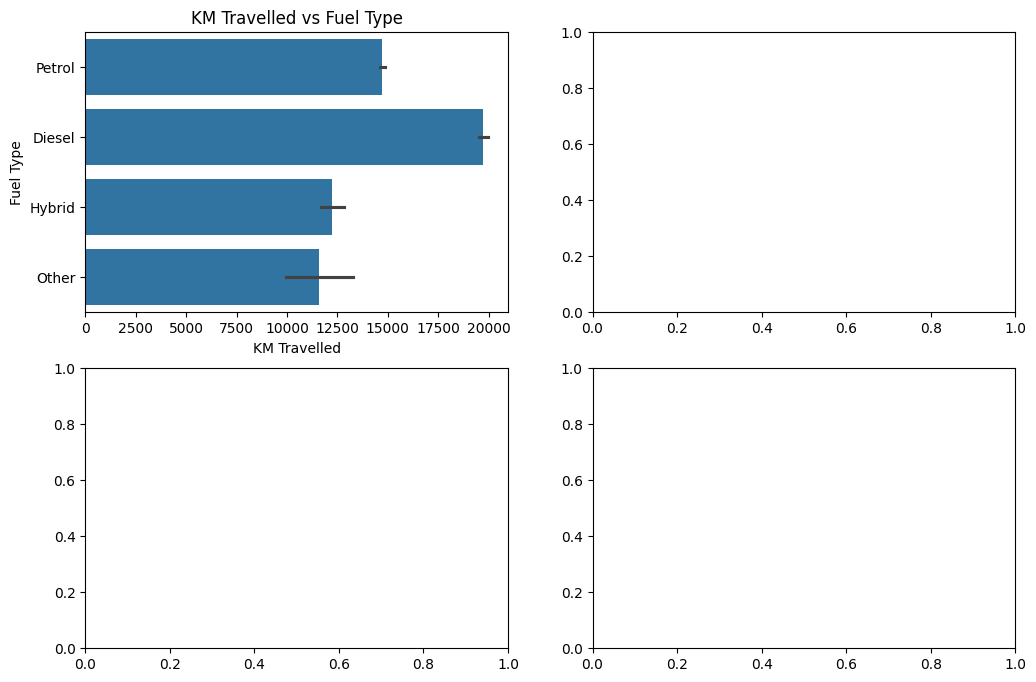

In [82]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: KM Travelled vs Fuel Type
sns.barplot(x=data['mileage'], y=data['fuelType'], data=data, ax=axs[0, 0])
axs[0, 0].set_title('KM Travelled vs Fuel Type')
axs[0, 0].set_xlabel('KM Travelled')
axs[0, 0].set_ylabel('Fuel Type')

# Plot 2: Miles per Gallon vs Fuel Type
sns.barplot(x=data['mpg'], y=data['fueltype'], data=data, ax=axs[0, 1])
axs[0, 1].set_title('Miles per Gallon vs Fuel Type')
axs[0, 1].set_xlabel('Miles per Gallon')
axs[0, 1].set_ylabel('Fuel Type')

# Plot 3: Miles per Gallon vs Transmission
sns.barplot(x=data['mpg'], y=data['transmission'], data=data, ax=axs[1, 0])
axs[1, 0].set_title('Miles per Gallon vs Transmission')
axs[1, 0].set_xlabel('Miles per Gallon')
axs[1, 0].set_ylabel('Transmission')

plt.tight_layout()
plt.show()


<Axes: xlabel='mileage', ylabel='transmission'>

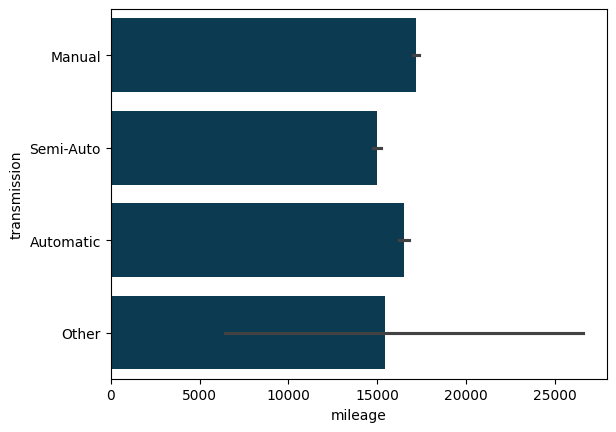

In [76]:
sns.barplot(
    x=data['mileage'],   # X-axis: Index (categories) of the value counts
    y=data['transmission'],         # Y-axis: The actual counts                  # Specify the subplot axis
    color='#003f5c', 
)

## BoxPlot

In [17]:
num_cols.columns

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')

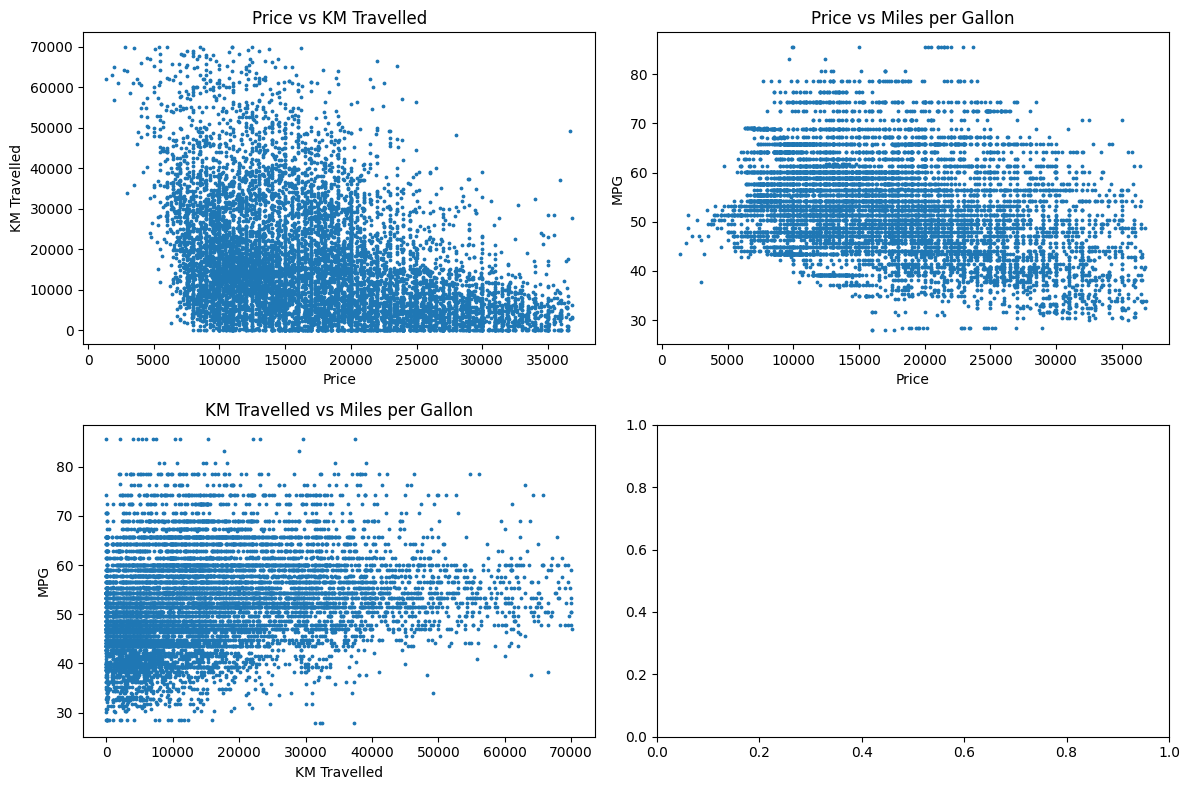

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].scatter(data['price'].iloc[:10000], data['mileage'].iloc[:10000], s=3)
axs[0, 0].set_title('Price vs KM Travelled')
axs[0, 0].set_xlabel('Price')
axs[0, 0].set_ylabel('KM Travelled')

axs[0, 1].scatter(data['price'].iloc[:10000], data['mpg'].iloc[:10000], s=3)
axs[0, 1].set_title('Price vs Miles per Gallon')
axs[0, 1].set_xlabel('Price')
axs[0, 1].set_ylabel('MPG')

axs[1, 0].scatter(data['mileage'].iloc[:10000], data['mpg'].iloc[:10000], s=3)
axs[1, 0].set_title('KM Travelled vs Miles per Gallon')
axs[1, 0].set_xlabel('KM Travelled')
axs[1, 0].set_ylabel('MPG')

plt.tight_layout()
plt.show()


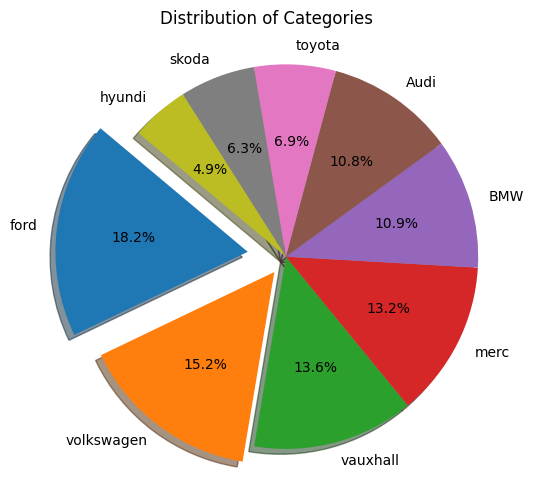

In [19]:
cat_counts = cat_cols['Manufacturer'].value_counts()
explode1 = [0.2,0.1,0,0,0,0,0,0,0]

plt.figure(figsize=(6,6))
plt.pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=140, explode=explode1, shadow=True)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

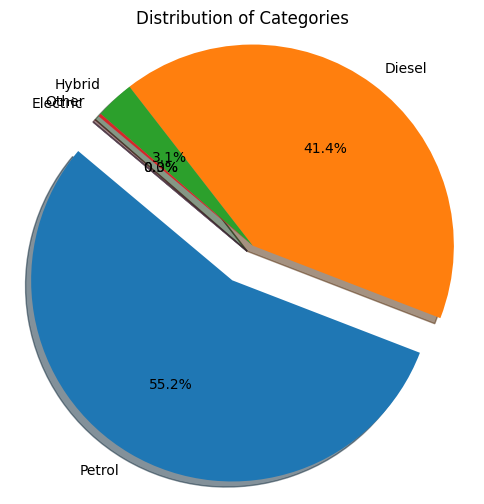

In [20]:

cat_counts = cat_cols['fuelType'].value_counts()
explode2 = [0.2,0,0,0,0]

plt.figure(figsize=(6,6))
plt.pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=140, shadow=True, explode=explode2)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

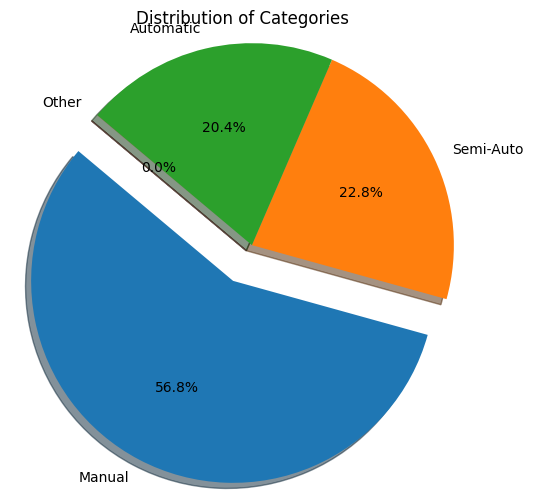

In [21]:
cat_counts = cat_cols['transmission'].value_counts()
explode3 = [0.2,0,0,0]

plt.figure(figsize=(6,6))
plt.pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=140, shadow=True, explode=explode3)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()